In [1]:
# imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
tsa_solar_df = pd.read_csv(
    Path('/Users', 'tylerhubbard', 'umnfintech', 'project2_group2', 'Wisky', 'Solar.csv'),
    infer_datetime_format=True, parse_dates=True
)
tsa_solar_df.head(10)

,Unnamed: 0,Renewable Energy Type,0:00,0:05,0:10,0:15,0:20,0:25,0:30,0:35,...,23:10,23:15,23:20,23:25,23:30,23:35,23:40,23:45,23:50,Day of Month
0,0,Solar,-28,-29,-31,-34,-35,-36,-38,-38,...,-38,-38,-38,-38,-38,-38,-38,-38,-38.0,"March 1st, 2022"
1,0,Solar,-38,-37,-37,-38,-33,-37,-37,-37,...,3,1,-2,-3,-4,-4,-3,-4,-3.0,"March 2nd, 2022"
2,0,Solar,-3,-3,-4,-4,-4,-4,-4,-4,...,39,39,40,40,40,40,39,39,38.0,"March 3rd, 2022"
3,0,Solar,44,44,44,44,44,44,44,44,...,-43,-43,-43,-43,-41,-41,-41,-41,-41.0,"March 4th, 2022"
4,0,Solar,-41,-41,-41,-41,-41,-41,-41,-41,...,-39,-43,-44,-44,-44,-44,-44,-44,-45.0,"March 5th, 2022"
5,0,Solar,-44,-44,-44,-44,-44,-44,-44,-44,...,-17,-27,-36,-38,-40,-40,-40,-40,-40.0,"March 6th, 2022"
6,0,Solar,-40,-40,-40,-41,-41,-41,-41,-41,...,-41,-40,-40,-40,-40,-40,-40,-40,-40.0,"March 7th, 2022"
7,0,Solar,-40,-41,-43,-44,-43,-41,-41,-41,...,-7,-19,-30,-38,-42,-41,-39,-39,-39.0,"March 8th, 2022"
8,0,Solar,-39,-39,-39,-39,-39,-39,-39,-39,...,-17,-29,-38,-39,-40,-39,-39,-40,-40.0,"March 9th, 2022"
9,0,Solar,-39,-39,-40,-40,-41,-41,-40,-40,...,-11,-11,-12,-12,-12,-12,-12,-12,-11.0,"March 10th, 2022"


In [4]:
tsa_solar_df.drop(columns=['Unnamed: 0' ], inplace=True)
tsa_solar_df.head()

,Renewable Energy Type,0:00,0:05,0:10,0:15,0:20,0:25,0:30,0:35,0:40,...,23:10,23:15,23:20,23:25,23:30,23:35,23:40,23:45,23:50,Day of Month
0,Solar,-28,-29,-31,-34,-35,-36,-38,-38,-38,...,-38,-38,-38,-38,-38,-38,-38,-38,-38.0,"March 1st, 2022"
1,Solar,-38,-37,-37,-38,-33,-37,-37,-37,-37,...,3,1,-2,-3,-4,-4,-3,-4,-3.0,"March 2nd, 2022"
2,Solar,-3,-3,-4,-4,-4,-4,-4,-4,-4,...,39,39,40,40,40,40,39,39,38.0,"March 3rd, 2022"
3,Solar,44,44,44,44,44,44,44,44,44,...,-43,-43,-43,-43,-41,-41,-41,-41,-41.0,"March 4th, 2022"
4,Solar,-41,-41,-41,-41,-41,-41,-41,-41,-41,...,-39,-43,-44,-44,-44,-44,-44,-44,-45.0,"March 5th, 2022"


In [5]:
tsa_solar_df_2 = pd.melt(tsa_solar_df, id_vars = ['Day of Month','Renewable Energy Type'], var_name='time', value_name='energy supply')
tsa_solar_df_2.set_index(['time', 'Day of Month'], inplace=True)
tsa_solar_df_2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
tsa_solar_df_2 = tsa_solar_df_2.drop(columns = ['Renewable Energy Type'])
tsa_solar_df_2.head(50)

energy supply
time Day of Month                   
0:00 March 1st, 2022           -28.0
     March 2nd, 2022           -38.0
     March 3rd, 2022            -3.0
     March 4th, 2022            44.0
     March 5th, 2022           -41.0
     March 6th, 2022           -44.0
     March 7th, 2022           -40.0
     March 8th, 2022           -40.0
     March 9th, 2022           -39.0
     March 10th, 2022          -39.0
     March 11th, 2022          -12.0
     March 12th, 2022          -42.0
     March 13th, 2022           39.0
     March 14th, 2022          -12.0
     March 15th, 2022          -41.0
     March 16th, 2022          -43.0
     March 18th, 2022           41.0
     March 19th, 2022          -24.0
     March 20th, 2022          -42.0
     March 21st, 2022          -42.0
     March 22nd, 2022          -36.0
     March 24th, 2022          -41.0
     March 25th, 2022          -39.0
     March 26th, 2022          -38.0
     March 27th, 2022          -40.0
     March 28th, 2022          -40.0
     March 29th, 2022          -36.0
     March 30th, 2022          -42.0
     March 31st, 2022          -43.0
0:05 March 1st, 2022           -29.0
     March 2nd, 2022           -37.0
     March 3rd, 2022            -3.0
     March 4th, 2022            44.0
     March 5th, 2022           -41.0
     March 6th, 2022           -44.0
     March 7th, 2022           -40.0
     March 8th, 2022           -41.0
     March 9th, 2022           -39.0
     March 10th, 2022          -39.0
     March 11th, 2022          -12.0
     March 12th, 2022          -42.0
     March 13th, 2022           39.0
     March 14th, 2022          -12.0
     March 15th, 2022          -41.0
     March 16th, 2022          -43.0
     March 18th, 2022           21.0
     March 19th, 2022          -24.0
     March 20th, 2022          -42.0
     March 21st, 2022          -41.0
     March 22nd, 2022          -36.0

In [2]:
tsa_solar_df_2.plot(figsize=(20,10), rot=45, grid=True, title='March 2022 - CA Solar Energy Supply')
plt.margins(x=0)

NameError: name 'tsa_solar_df_2' is not defined

In [7]:
import statsmodels.api as sm

supply_noise, supply_trend = sm.tsa.filters.hpfilter(tsa_solar_df_2['energy supply'])
supply_noise

time   Day of Month    
0:00   March 1st, 2022     -7.895090
       March 2nd, 2022    -17.466307
       March 3rd, 2022     17.967411
       March 4th, 2022     65.421914
       March 5th, 2022    -19.098177
                             ...    
23:50  March 24th, 2022    -5.035570
       March 25th, 2022    -3.350248
       March 26th, 2022    -4.663977
       March 27th, 2022    -3.979847
       March 31st, 2022     3.701970
Name: energy supply_cycle, Length: 8279, dtype: float64

In [8]:
solar_supply = tsa_solar_df_2['energy supply'].to_frame()
solar_supply['Noise'] = supply_noise
solar_supply['Trend'] = supply_trend
solar_supply.tail()

energy supply     Noise      Trend
time  Day of Month                                        
23:50 March 24th, 2022          -39.0 -5.035570 -33.964430
      March 25th, 2022          -38.0 -3.350248 -34.649752
      March 26th, 2022          -40.0 -4.663977 -35.336023
      March 27th, 2022          -40.0 -3.979847 -36.020153
      March 31st, 2022          -33.0  3.701970 -36.701970

<AxesSubplot:title={'center':'Solar Energy vs. the Trend'}, xlabel='time,Day of Month'>

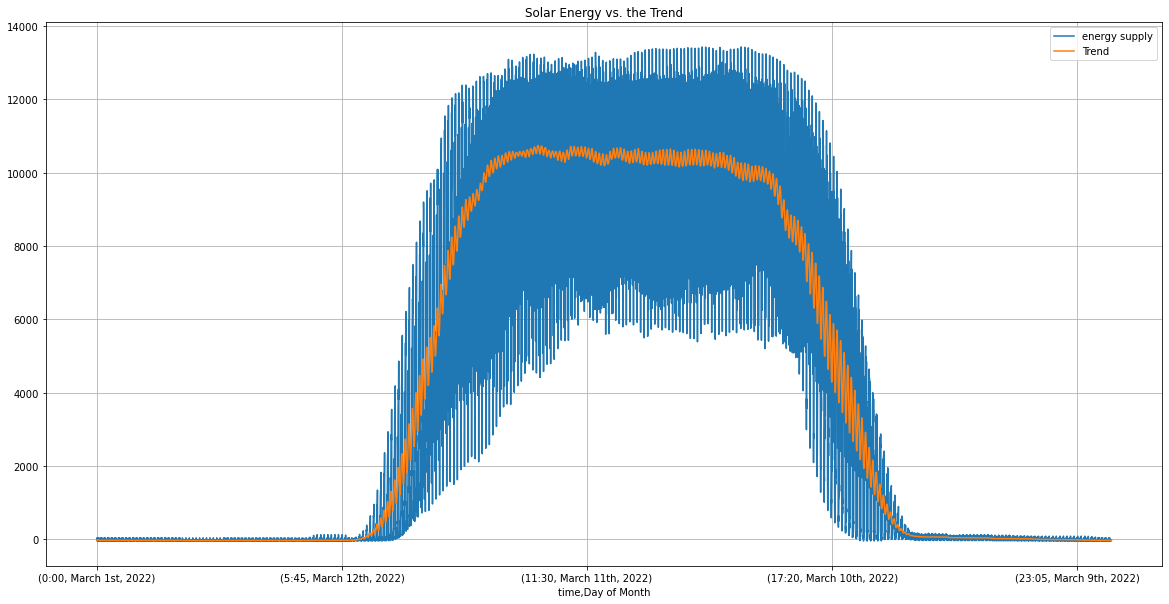

In [9]:
# Plot the Settle Price vs. the Trend for 2015 to the present
solar_supply.drop(columns=['Noise']).plot(figsize=(20,10),
                                        title='Solar Energy vs. the Trend',
                                        grid=True)
plt.margins(x=0)

<AxesSubplot:title={'center':'Solar Supply Noise'}, xlabel='time,Day of Month'>

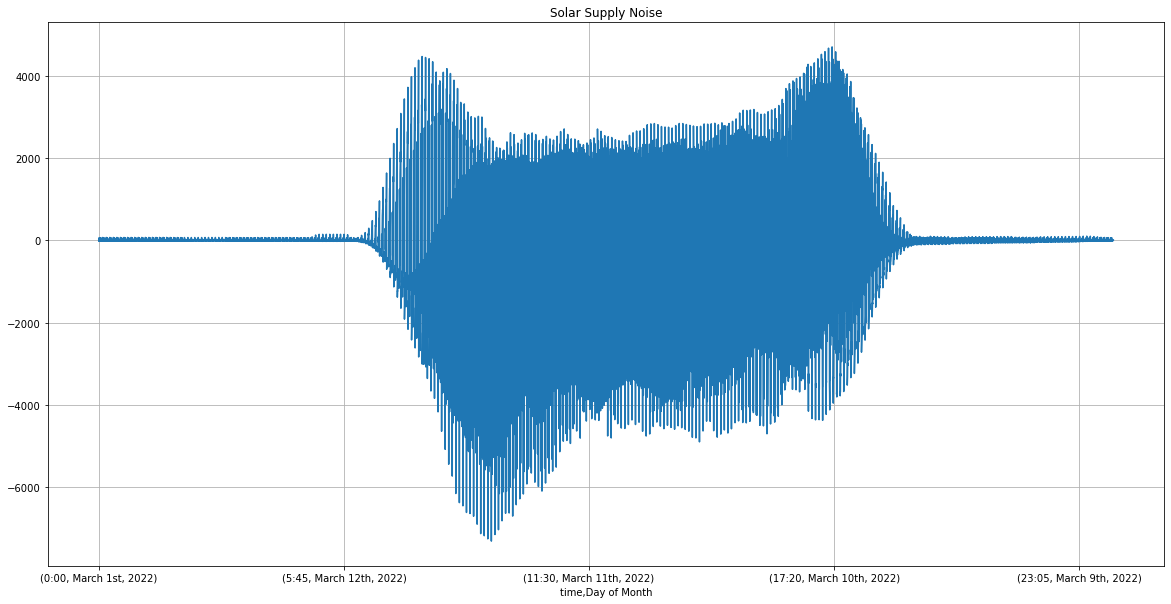

In [10]:
# Plot the Settle Noise
solar_supply['Noise'].plot(title='Solar Supply Noise', figsize=(20,10), grid=True)
plt.margins(x=0)

In [11]:
solar_returns = tsa_solar_df_2[["energy supply"]].pct_change() * 100
solar_returns = solar_returns.rename(columns = {'energy supply' : 'returns'})
solar_returns = solar_returns.replace([np.inf, -np.inf], np.nan)
solar_returns.dropna(inplace=True)
solar_returns.astype(np.int64)
solar_returns.head(20)

returns
time Day of Month                 
0:00 March 2nd, 2022     35.714286
     March 3rd, 2022    -92.105263
     March 4th, 2022  -1566.666667
     March 5th, 2022   -193.181818
     March 6th, 2022      7.317073
     March 7th, 2022     -9.090909
     March 8th, 2022      0.000000
     March 9th, 2022     -2.500000
     March 10th, 2022     0.000000
     March 11th, 2022   -69.230769
     March 12th, 2022   250.000000
     March 13th, 2022  -192.857143
     March 14th, 2022  -130.769231
     March 15th, 2022   241.666667
     March 16th, 2022     4.878049
     March 18th, 2022  -195.348837
     March 19th, 2022  -158.536585
     March 20th, 2022    75.000000
     March 21st, 2022     0.000000
     March 22nd, 2022   -14.285714

<AxesSubplot:xlabel='time'>

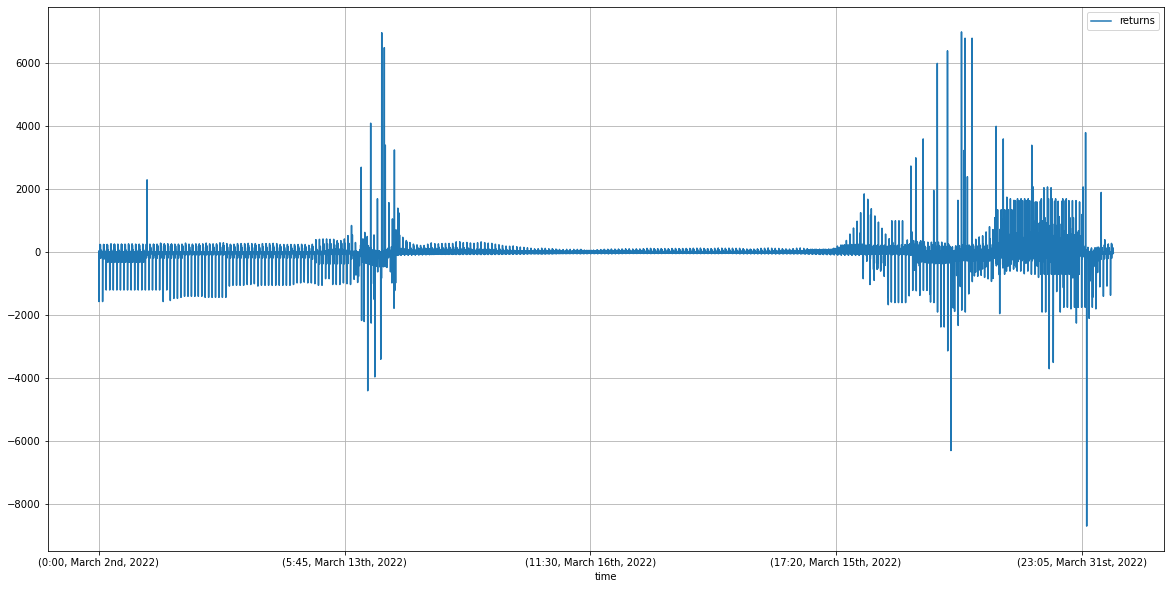

In [12]:
solar_returns.plot(figsize=(20,10), grid=True, xlabel='time')
plt.margins(x=0)

In [13]:
# Create a lagged return using the shift function
solar_returns['lagged returns'] = solar_returns['returns'].shift()
solar_returns.dropna(inplace=True)
solar_returns

returns  lagged returns
time  Day of Month                                 
0:00  March 3rd, 2022    -92.105263       35.714286
      March 4th, 2022  -1566.666667      -92.105263
      March 5th, 2022   -193.181818    -1566.666667
      March 6th, 2022      7.317073     -193.181818
      March 7th, 2022     -9.090909        7.317073
...                             ...             ...
23:50 March 24th, 2022   143.750000      -55.555556
      March 25th, 2022    -2.564103      143.750000
      March 26th, 2022     5.263158       -2.564103
      March 27th, 2022     0.000000        5.263158
      March 31st, 2022   -17.500000        0.000000

[8258 rows x 2 columns]

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

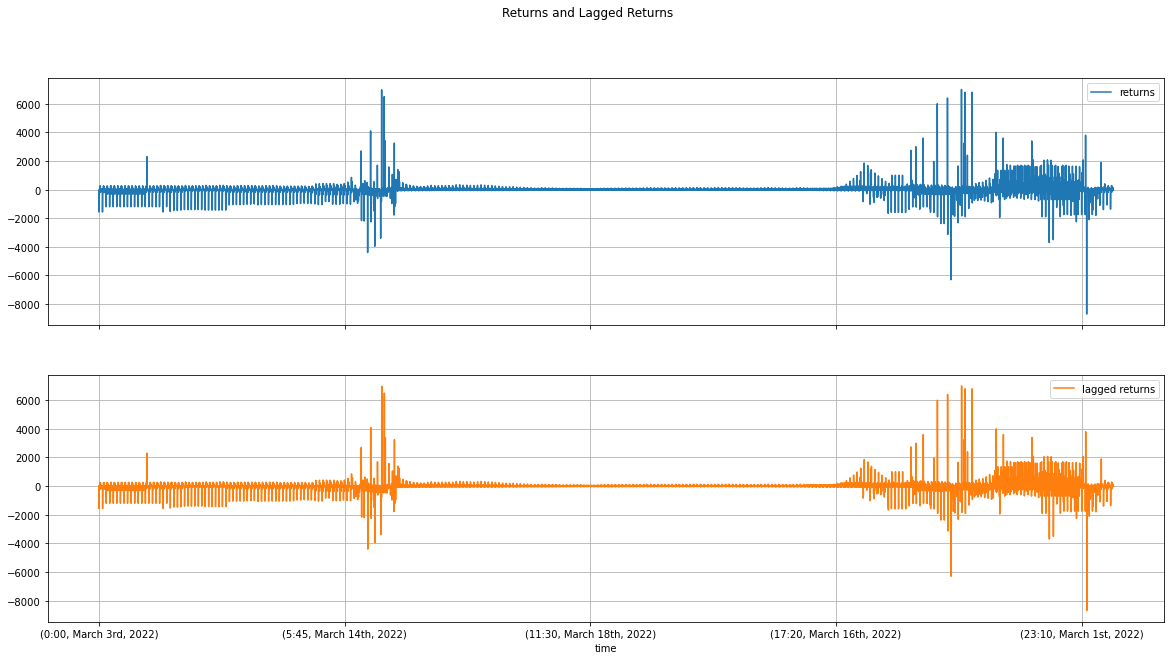

In [17]:
solar_returns.plot(subplots=True, figsize=(20,10), grid=True, title = 'Returns and Lagged Returns', xlabel='time')
plt.margins(x=0)

In [18]:
train = solar_returns[2500:4500]
test = solar_returns[4500:6000]

In [19]:
# Create four dataframes:

# X_train (training set using just the independent variables)
X_train = train['lagged returns'].to_frame()

# X_test (test set of of just the independent variables)
X_test = test['lagged returns'].to_frame()

# Y_train (training set using just the "y" variable, i.e., "Futures Return")
Y_train = train['returns']

# Y_test (test set of just the "y" variable):
Y_test = test['returns']

In [20]:
X_train = X_train.dropna(inplace=False)
X_train

lagged returns
time  Day of Month                    
7:10  March 27th, 2022      -45.620915
      March 28th, 2022       10.576923
      March 29th, 2022      -63.913043
      March 30th, 2022      371.686747
      March 31st, 2022       33.844189
...                                ...
12:55 March 20th, 2022      -43.280491
      March 21st, 2022      -12.134831
      March 22nd, 2022       91.703964
      March 24th, 2022       -3.060118
      March 25th, 2022       14.846035

[2000 rows x 1 columns]

In [21]:
X_test = X_test.dropna(inplace=False)
X_test

lagged returns
time  Day of Month                    
12:55 March 26th, 2022       -3.579988
      March 27th, 2022      -13.399099
      March 28th, 2022        5.570006
      March 29th, 2022      -30.518267
      March 30th, 2022       19.356811
...                                ...
17:20 March 11th, 2022      -10.308285
      March 12th, 2022       29.914071
      March 13th, 2022      -10.500207
      March 14th, 2022       98.521940
      March 15th, 2022      119.520707

[1500 rows x 1 columns]

In [22]:
Y_train = Y_train.astype(np.int64)
Y_train

time   Day of Month    
7:10   March 27th, 2022     10
       March 28th, 2022    -63
       March 29th, 2022    371
       March 30th, 2022     33
       March 31st, 2022    -12
                          ... 
12:55  March 20th, 2022    -12
       March 21st, 2022     91
       March 22nd, 2022     -3
       March 24th, 2022     14
       March 25th, 2022     -3
Name: returns, Length: 2000, dtype: int64

In [23]:
Y_test = Y_test.astype(float)
Y_test

time   Day of Month    
12:55  March 26th, 2022    -13.399099
       March 27th, 2022      5.570006
       March 28th, 2022    -30.518267
       March 29th, 2022     19.356811
       March 30th, 2022     22.784551
                              ...    
17:20  March 11th, 2022     29.914071
       March 12th, 2022    -10.500207
       March 13th, 2022     98.521940
       March 14th, 2022    119.520707
       March 15th, 2022    -39.766826
Name: returns, Length: 1500, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [25]:
predictions = model.predict(X_test)

<AxesSubplot:title={'center':'Returns and Predicted Return'}, xlabel='time,Day of Month'>

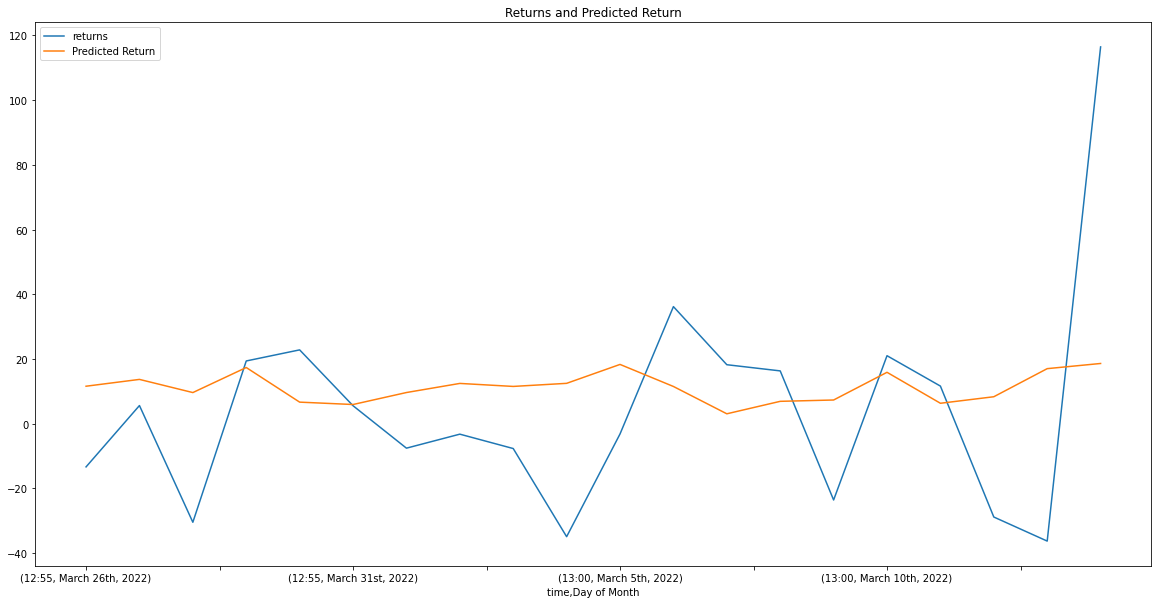

In [26]:
results_assembled = Y_test.to_frame()
results_assembled['Predicted Return'] = predictions
results_assembled[:20].plot(subplots=False, figsize=(20,10), title='Returns and Predicted Return')
plt.margins(x=0)

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(
    results_assembled['returns'],
    results_assembled['Predicted Return']
)
rmse = np.sqrt(mse)
print(f'Out-of-Sample Root Mean Squared Error (RMSE): {rmse}')

Out-of-Sample Root Mean Squared Error (RMSE): 33.97779031623274


In [28]:
in_sample_results = Y_train.to_frame()
in_sample_results['in-sample'] = model.predict(X_train)
in_sample_mse = mean_squared_error(
    in_sample_results['returns'],
    in_sample_results['in-sample']
)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f'In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}')

In-sample Root Mean Squared Error (RMSE): 48.65291144890779
